In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic Dataset Case Study with Seaborn

This notebook demonstrates how to use Seaborn for exploratory data analysis using the famous Titanic dataset. We'll explore various aspects of the dataset and create visualizations to gain insights into the factors that influenced survival rates among passengers.

## Dataset Description

The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank on its maiden voyage in April 1912. The dataset includes various attributes such as passenger class, sex, age, fare, and whether the passenger survived or not.

In [2]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Display the first few rows of the dataset to understand its structure
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Get basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Get summary statistics of the dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preparation

Let's check for missing values and handle them appropriately.

Missing values in each column: 
 age            177
embarked         2
deck           688
embark_town      2
dtype: int64


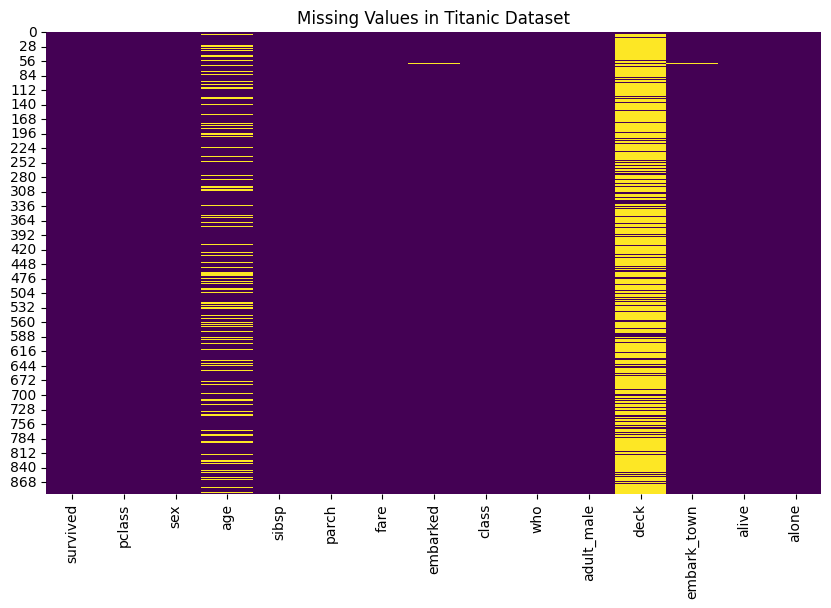

In [5]:
# Check for missing values
missing_values = titanic.isnull().sum()
print("Missing values in each column: \n", missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titanic Dataset")
plt.show()

In [6]:
# Handle missing values
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Add 'Unknown' category to deck and fill missing values
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Verify missing values handled
print("Missing values after handling:", titanic.isnull().sum()[titanic.isnull().sum() > 0])


Missing values after handling: embark_town    2
dtype: int64


## Exploratory Data Analysis

Let's explore the dataset to understand the factors that influenced survival rates.

### Survival Overview

First, let's look at the overall survival rate.

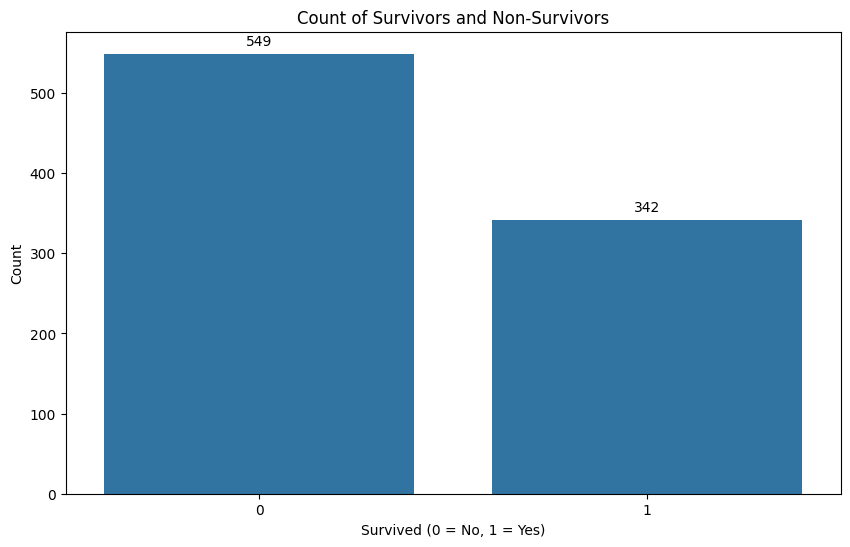

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=titanic)  # no palette here
plt.title("Count of Survivors and Non-Survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add count labels on top of bars
for i, count in enumerate(titanic['survived'].value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()


### Survival by Gender

Let's examine how survival rates differed between males and females.

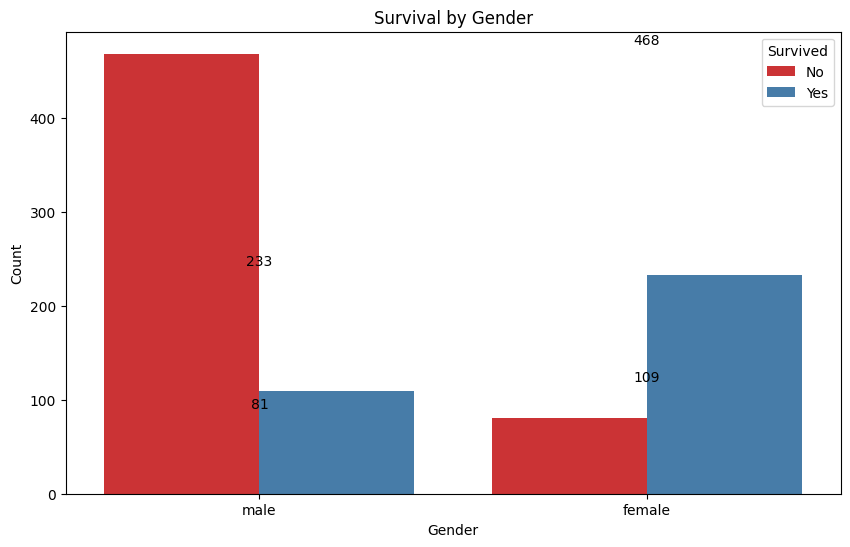

Survival Rate by Gender: sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


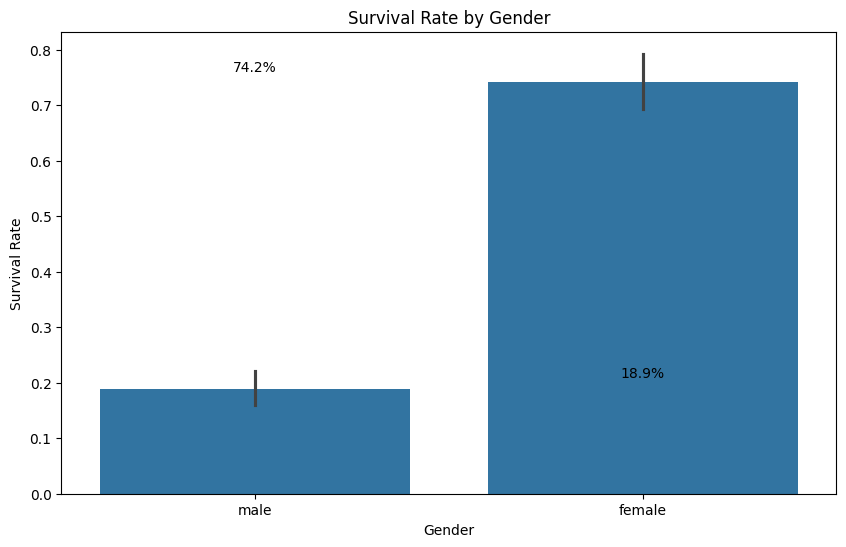

In [8]:
# Count of survivors by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Add count labels on top of bars
for i, (sex, survived) in enumerate(titanic.groupby(['sex', 'survived']).size().items()):
    plt.text(i//2, survived + 10, str(survived), ha='center')
    
plt.show()

# Calculate survival rate by gender
survival_by_gender = titanic.groupby('sex')['survived'].mean() * 100
print("Survival Rate by Gender:", survival_by_gender)

# Visualize survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

# Add percentage labels on top of bars
for i, rate in enumerate(survival_by_gender):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center')
    
plt.show()

### Survival by Passenger Class

Let's examine how survival rates differed across passenger classes.

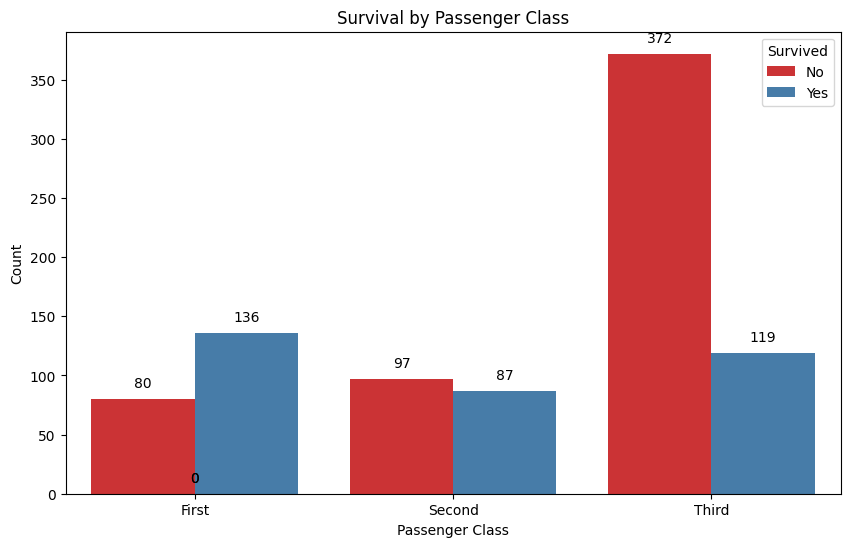

Survival Rate by Class: class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


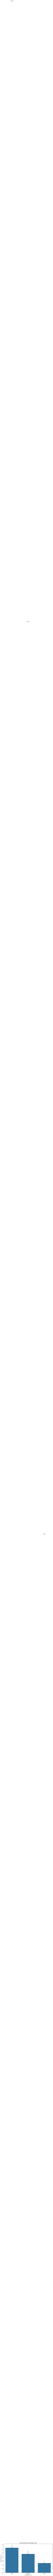

In [9]:
# Count of survivors by class
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', hue='survived', data=titanic, palette='Set1', order=['First', 'Second', 'Third'])
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Add count labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, int(height), ha="center")

plt.show()

# Calculate survival rate by class (explicitly set observed to suppress warning)
survival_by_class = titanic.groupby('class', observed=False)['survived'].mean() * 100
print("Survival Rate by Class:", survival_by_class)

# Visualize survival rate by class
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='class', y='survived', data=titanic, order=['First', 'Second', 'Third'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")

# Add percentage labels on bars
for i, rate in enumerate(survival_by_class):
    ax.text(i, rate + 2, f"{rate:.1f}%", ha='center')

plt.show()

### Survival by Age

Let's examine how survival rates varied across different age groups.

/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/4151857311.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (age_group, survived) in enumerate(titanic.groupby(['age_group', 'survived']).size().items()):


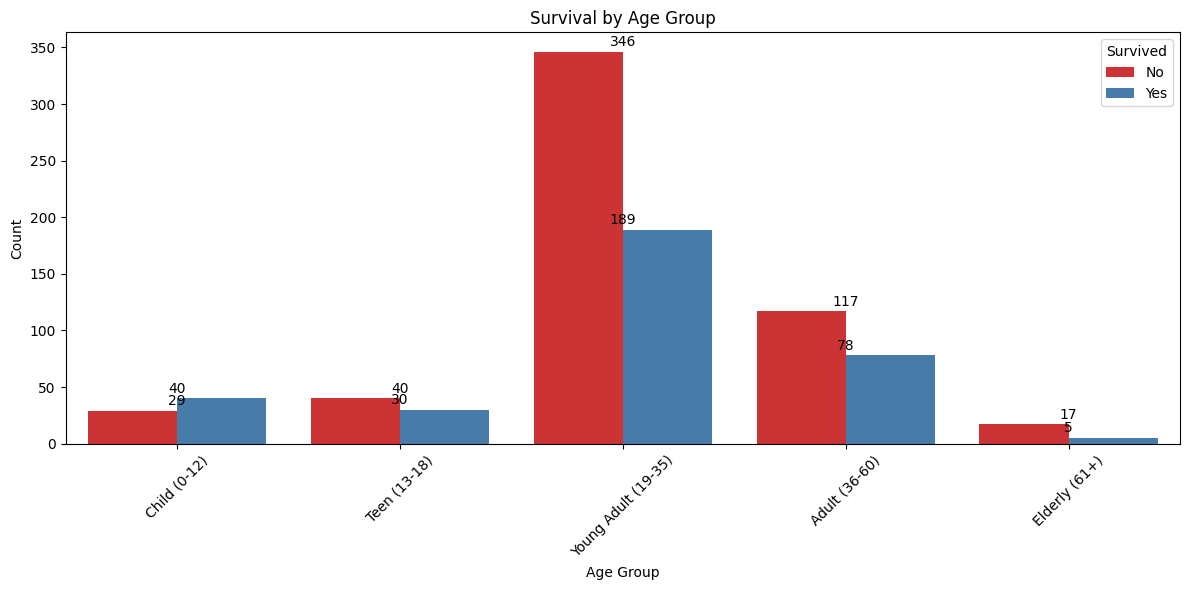

/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/4151857311.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = titanic.groupby('age_group')['survived'].mean() * 100


Survival Rate by Age Group: age_group
Child (0-12)           57.971014
Teen (13-18)           42.857143
Young Adult (19-35)    35.327103
Adult (36-60)          40.000000
Elderly (61+)          22.727273
Name: survived, dtype: float64


/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/4151857311.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='survived', data=titanic, palette='Set2')


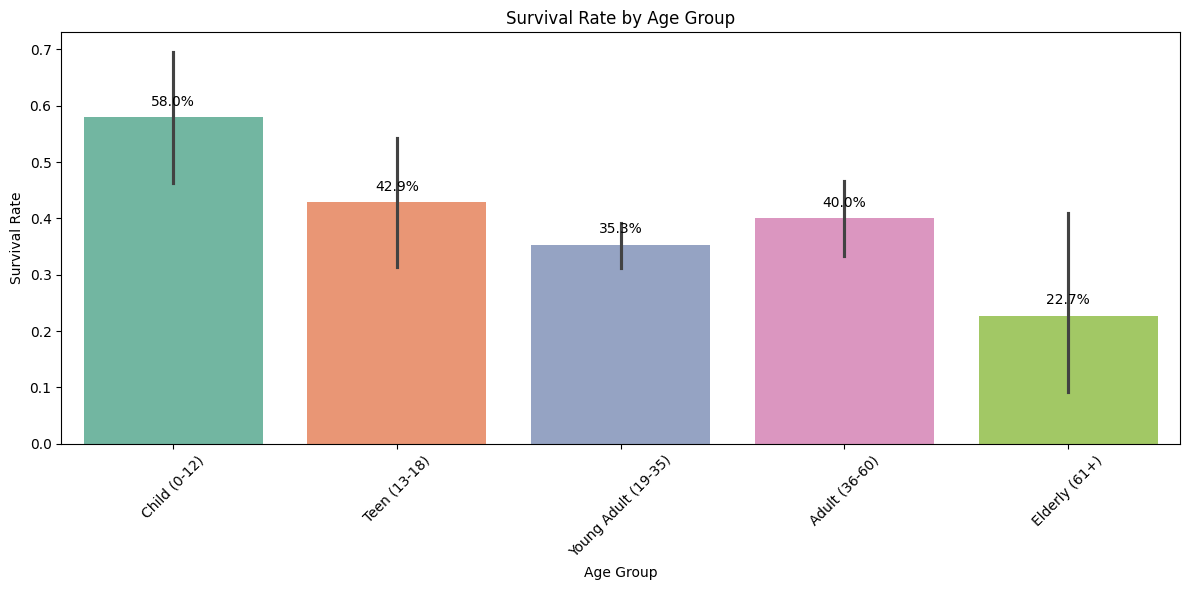

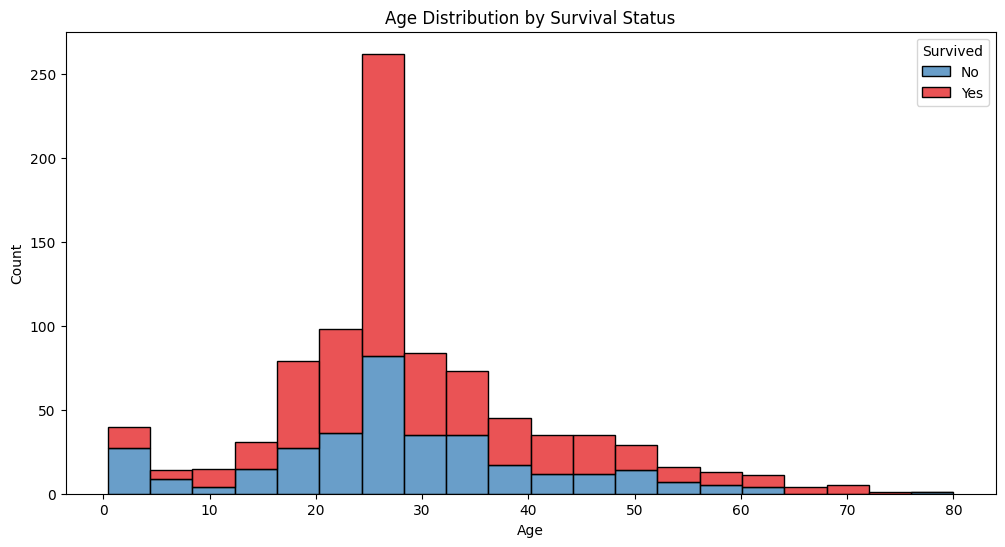

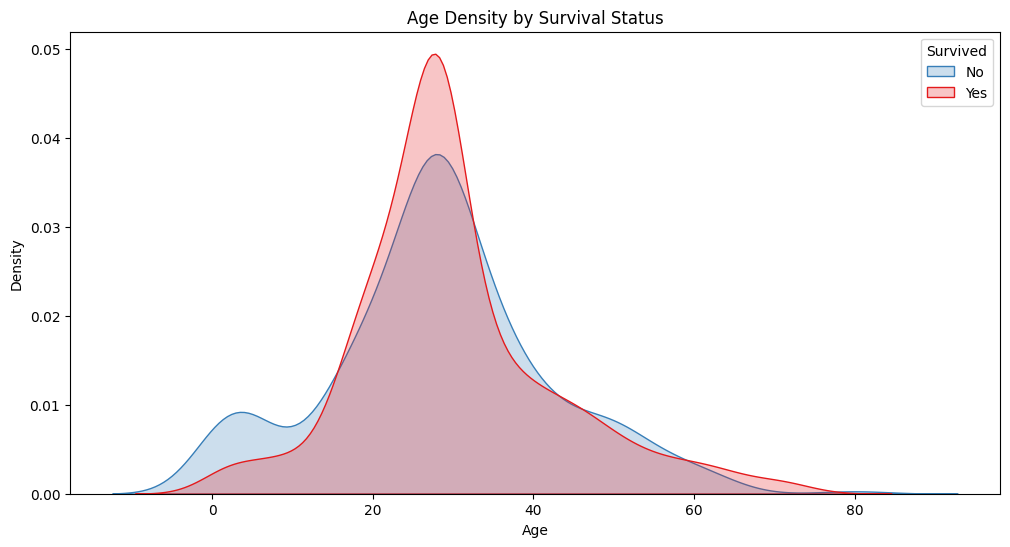

In [10]:
# Create age bins
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 
                                     'Adult (36-60)', 'Elderly (61+)'])

# Count of survivors by age group
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, (age_group, survived) in enumerate(titanic.groupby(['age_group', 'survived']).size().items()):
    plt.text(i//2, survived + 5, str(survived), ha='center')
    
plt.tight_layout()
plt.show()

# Calculate survival rate by age group
survival_by_age = titanic.groupby('age_group')['survived'].mean() * 100
print("Survival Rate by Age Group:", survival_by_age)

# Visualize survival rate by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='survived', data=titanic, palette='Set2')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)

# Add percentage labels on top of bars
for i, rate in enumerate(survival_by_age):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center')
    
plt.tight_layout()
plt.show()

# Distribution of age by survival status
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=20, palette='Set1')
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# KDE plot of age by survival status
plt.figure(figsize=(12, 6))
sns.kdeplot(data=titanic, x='age', hue='survived', fill=True, common_norm=False, palette='Set1')
plt.title("Age Density by Survival Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Survival by Gender and Class

Let's examine how survival rates varied across different combinations of gender and passenger class.

<Figure size 1200x600 with 0 Axes>

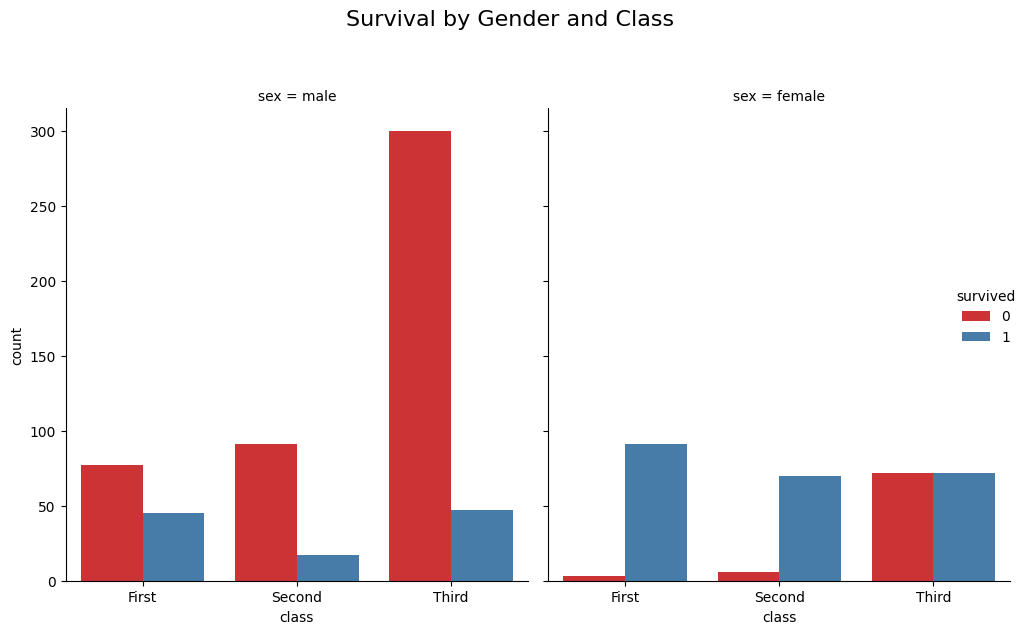

/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/31288617.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender_class = titanic.groupby(['sex', 'class'])['survived'].mean() * 100


Survival Rate by Gender and Class: sex     class 
female  First     96.808511
        Second    92.105263
        Third     50.000000
male    First     36.885246
        Second    15.740741
        Third     13.544669
Name: survived, dtype: float64


<Figure size 1200x600 with 0 Axes>

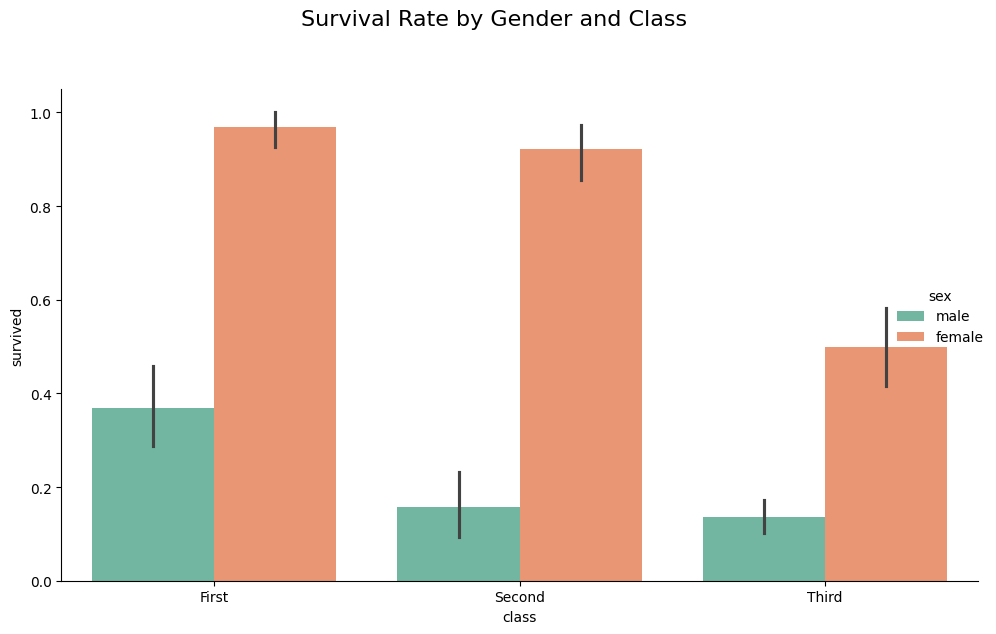

In [11]:
# Count of survivors by gender and class
plt.figure(figsize=(12, 6))
sns.catplot(x='class', hue='survived', col='sex', data=titanic, kind='count', palette='Set1', 
           order=['First', 'Second', 'Third'], height=6, aspect=0.8)
plt.suptitle("Survival by Gender and Class", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

# Calculate survival rate by gender and class
survival_by_gender_class = titanic.groupby(['sex', 'class'])['survived'].mean() * 100
print("Survival Rate by Gender and Class:", survival_by_gender_class)

# Visualize survival rate by gender and class
plt.figure(figsize=(12, 6))
sns.catplot(x='class', y='survived', hue='sex', data=titanic, kind='bar', palette='Set2', 
           order=['First', 'Second', 'Third'], height=6, aspect=1.5)
plt.suptitle("Survival Rate by Gender and Class", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

### Survival by Port of Embarkation

Let's examine how survival rates varied across different ports of embarkation.

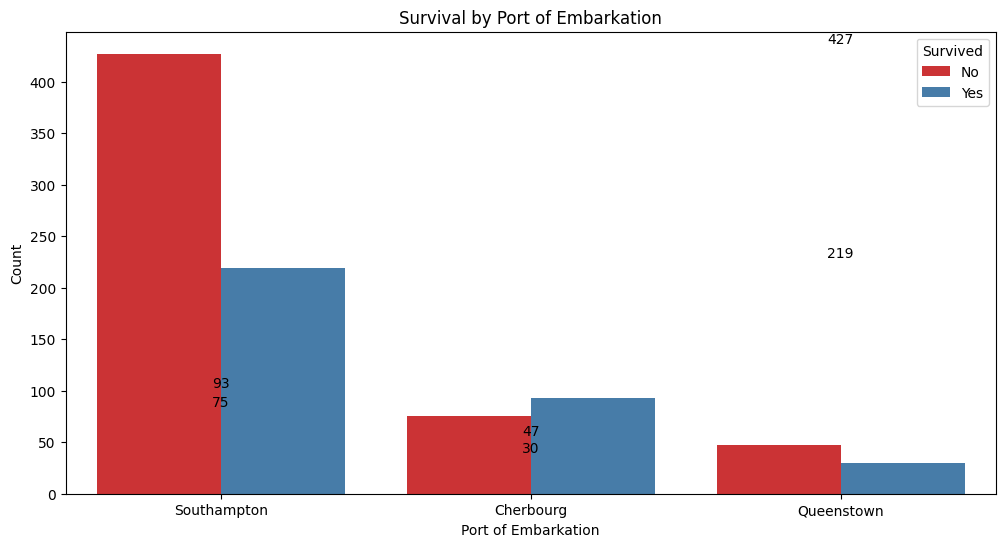

Survival Rate by Port of Embarkation: embarked_name
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.900929
Name: survived, dtype: float64


/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/1703147823.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked_name', y='survived', data=titanic, palette='Set2')


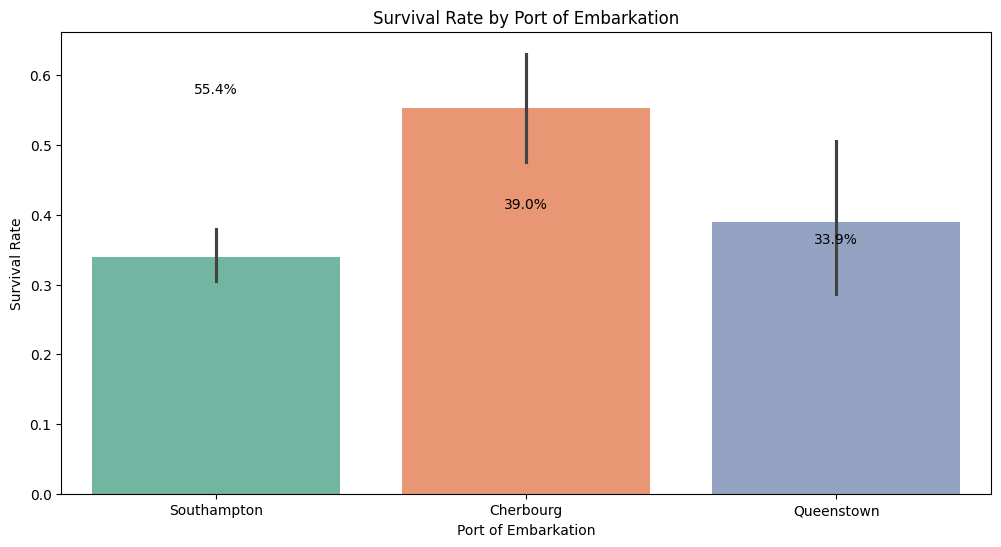

In [12]:
# Create a dictionary to map port codes to names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
titanic['embarked_name'] = titanic['embarked'].map(port_names)

# Count of survivors by port of embarkation
plt.figure(figsize=(12, 6))
sns.countplot(x='embarked_name', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Add count labels on top of bars
for i, (port, survived) in enumerate(titanic.groupby(['embarked_name', 'survived']).size().items()):
    plt.text(i//2, survived + 10, str(survived), ha='center')
    
plt.show()

# Calculate survival rate by port of embarkation
survival_by_port = titanic.groupby('embarked_name')['survived'].mean() * 100
print("Survival Rate by Port of Embarkation:", survival_by_port)

# Visualize survival rate by port of embarkation
plt.figure(figsize=(12, 6))
sns.barplot(x='embarked_name', y='survived', data=titanic, palette='Set2')
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")

# Add percentage labels on top of bars
for i, rate in enumerate(survival_by_port):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center')
    
plt.show()

### Survival by Family Size

Let's examine how survival rates varied based on family size (siblings/spouses + parents/children).

/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/2077065426.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (family, survived) in enumerate(titanic.groupby(['family_category', 'survived']).size().items()):


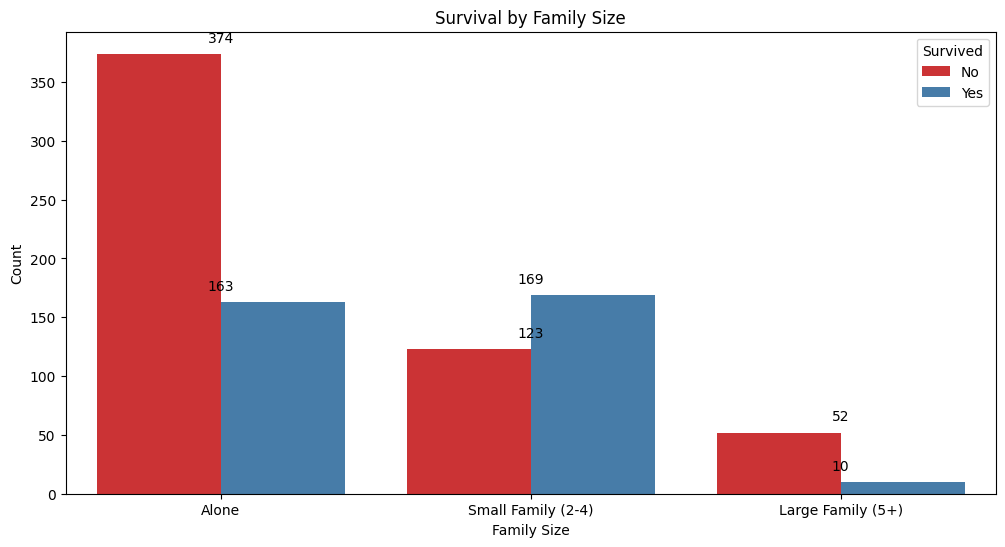

/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/2077065426.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_family = titanic.groupby('family_category')['survived'].mean() * 100


Survival Rate by Family Size: family_category
Alone                 30.353818
Small Family (2-4)    57.876712
Large Family (5+)     16.129032
Name: survived, dtype: float64


/var/folders/gg/b0ch6fts47z_36qzqzyssvbr0000gn/T/ipykernel_17908/2077065426.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_category', y='survived', data=titanic, palette='Set2')


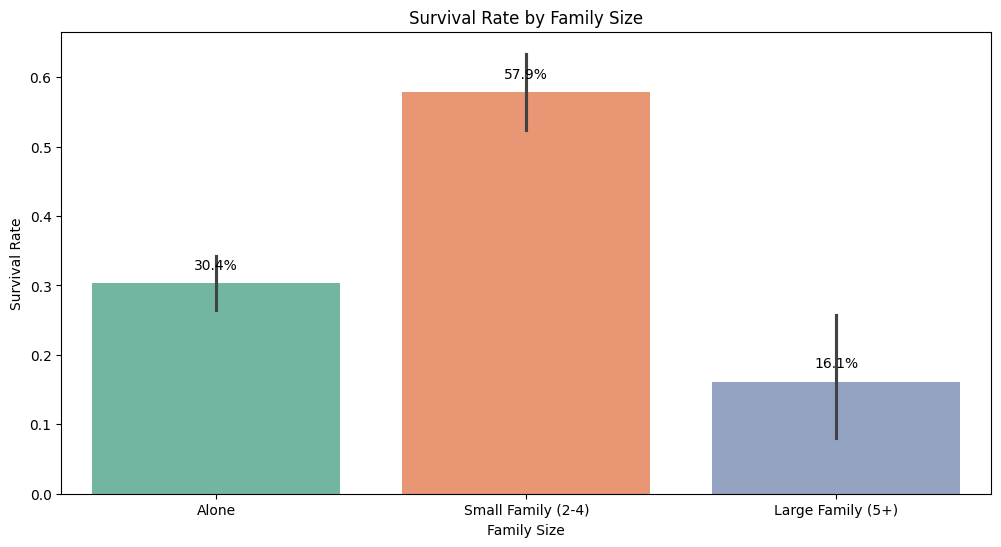

In [13]:
# Create a family size variable
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1  # +1 for the passenger themselves

# Create family size categories
titanic['family_category'] = pd.cut(titanic['family_size'], bins=[0, 1, 4, 20], 
                                   labels=['Alone', 'Small Family (2-4)', 'Large Family (5+)'])

# Count of survivors by family category
plt.figure(figsize=(12, 6))
sns.countplot(x='family_category', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Add count labels on top of bars
for i, (family, survived) in enumerate(titanic.groupby(['family_category', 'survived']).size().items()):
    plt.text(i//2, survived + 10, str(survived), ha='center')
    
plt.show()

# Calculate survival rate by family category
survival_by_family = titanic.groupby('family_category')['survived'].mean() * 100
print("Survival Rate by Family Size:", survival_by_family)

# Visualize survival rate by family category
plt.figure(figsize=(12, 6))
sns.barplot(x='family_category', y='survived', data=titanic, palette='Set2')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")

# Add percentage labels on top of bars
for i, rate in enumerate(survival_by_family):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center')
    
plt.show()

### Survival by Fare

Let's examine how survival rates varied based on the fare paid.

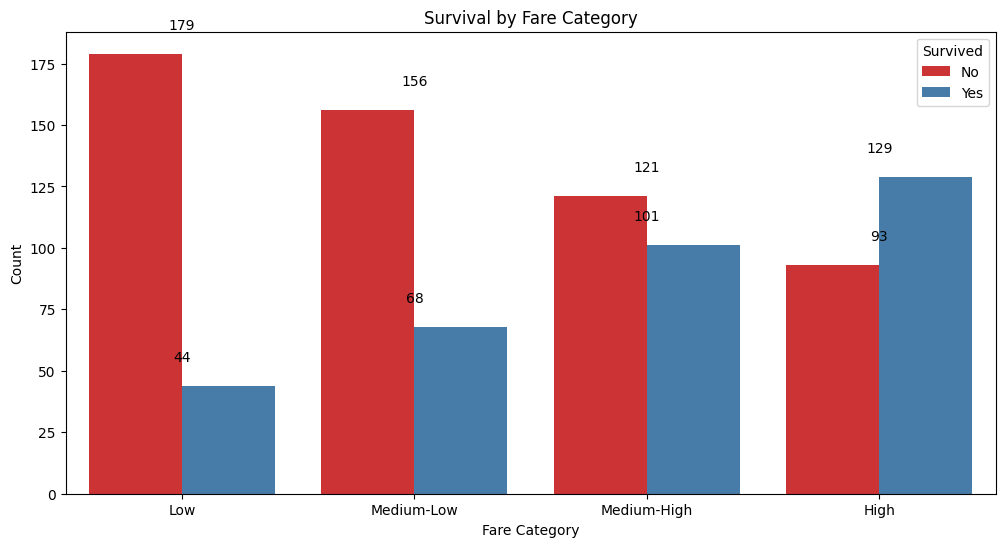

Survival Rate by Fare Category: fare_category
Low            19.730942
Medium-Low     30.357143
Medium-High    45.495495
High           58.108108
Name: survived, dtype: float64


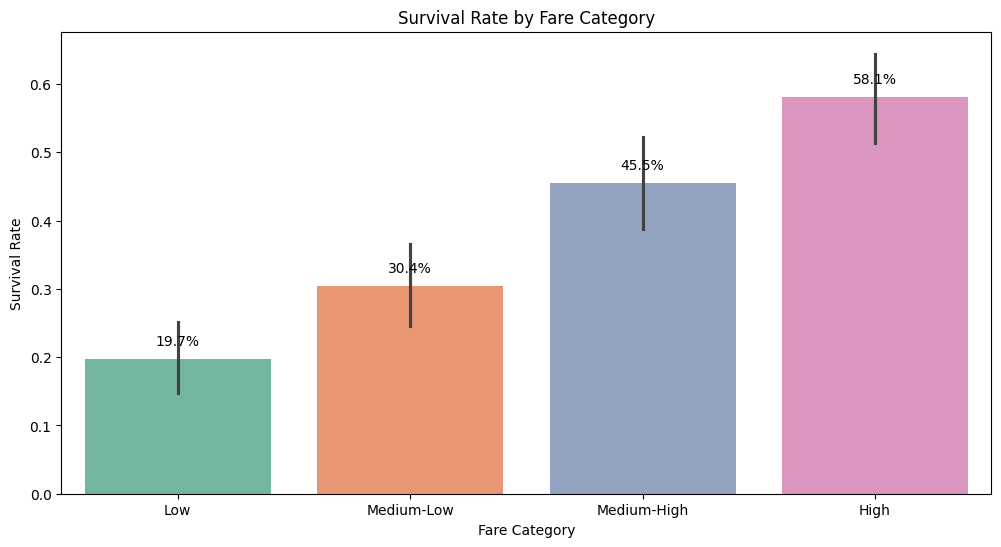

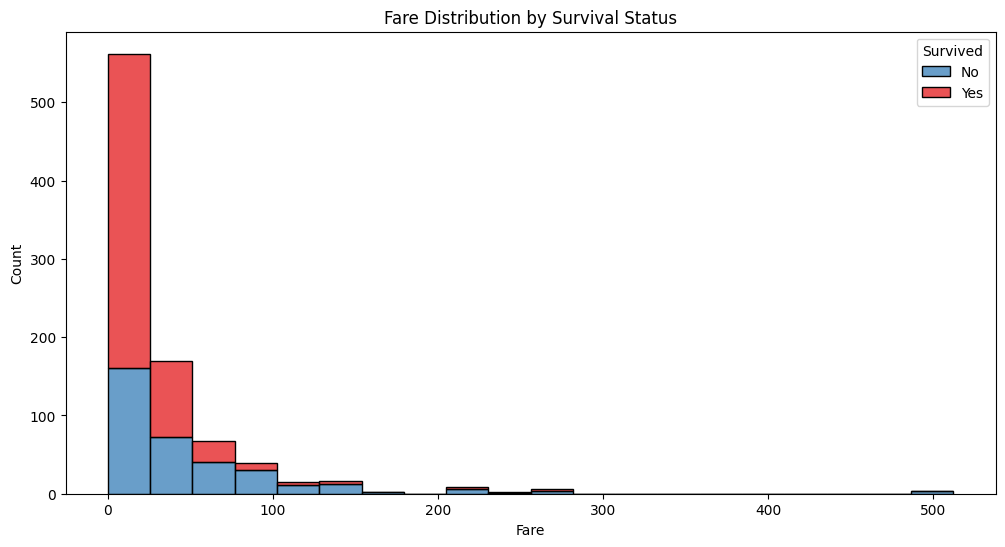

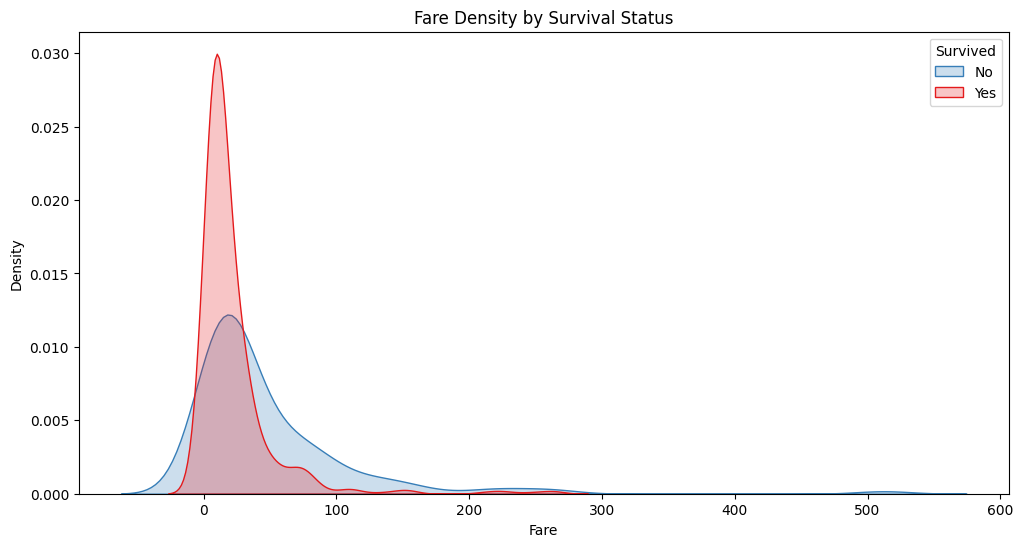

In [14]:
# Create fare categories
titanic['fare_category'] = pd.qcut(titanic['fare'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Count of survivors by fare category
plt.figure(figsize=(12, 6))
sns.countplot(x='fare_category', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Fare Category")
plt.xlabel("Fare Category")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Add count labels on top of bars
for i, (fare, survived) in enumerate(titanic.groupby(['fare_category', 'survived'], observed=False).size().items()):
    plt.text(i//2, survived + 10, str(survived), ha='center')

plt.show()

# Calculate survival rate by fare category with explicit observed
survival_by_fare = titanic.groupby('fare_category', observed=False)['survived'].mean() * 100
print("Survival Rate by Fare Category:", survival_by_fare)

# Visualize survival rate by fare category, fixing palette warning
plt.figure(figsize=(12, 6))
sns.barplot(x='fare_category', y='survived', data=titanic, palette='Set2', hue='fare_category', legend=False)
plt.title("Survival Rate by Fare Category")
plt.xlabel("Fare Category")
plt.ylabel("Survival Rate")

# Add percentage labels on top of bars
for i, rate in enumerate(survival_by_fare):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center')

plt.show()

# Distribution of fare by survival status
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='fare', hue='survived', multiple='stack', bins=20, palette='Set1')
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# KDE plot of fare by survival status
plt.figure(figsize=(12, 6))
sns.kdeplot(data=titanic, x='fare', hue='survived', fill=True, common_norm=False, palette='Set1')
plt.title("Fare Density by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


## Multivariate Analysis

Let's explore the relationships between multiple variables and survival rates.

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group', 'embarked_name', 'family_size',
       'family_category', 'fare_category'],
      dtype='object')


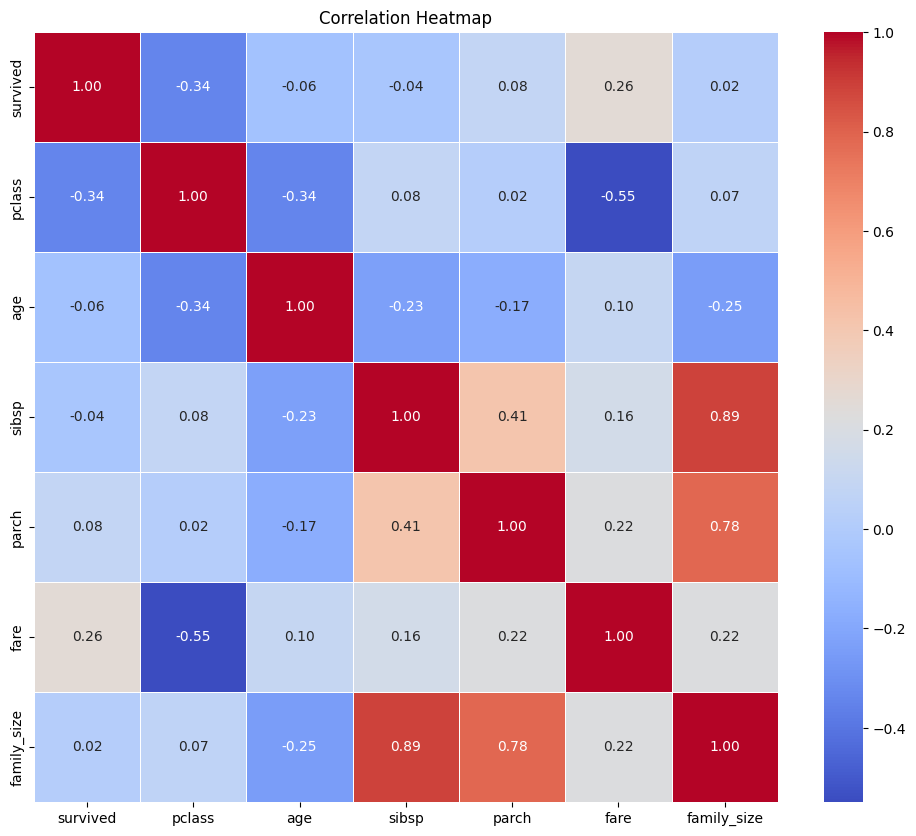

In [15]:
# Correlation heatmap of numeric variables
print(titanic.columns)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

plt.figure(figsize=(12, 10))
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']
corr = titanic[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1500x1200 with 0 Axes>

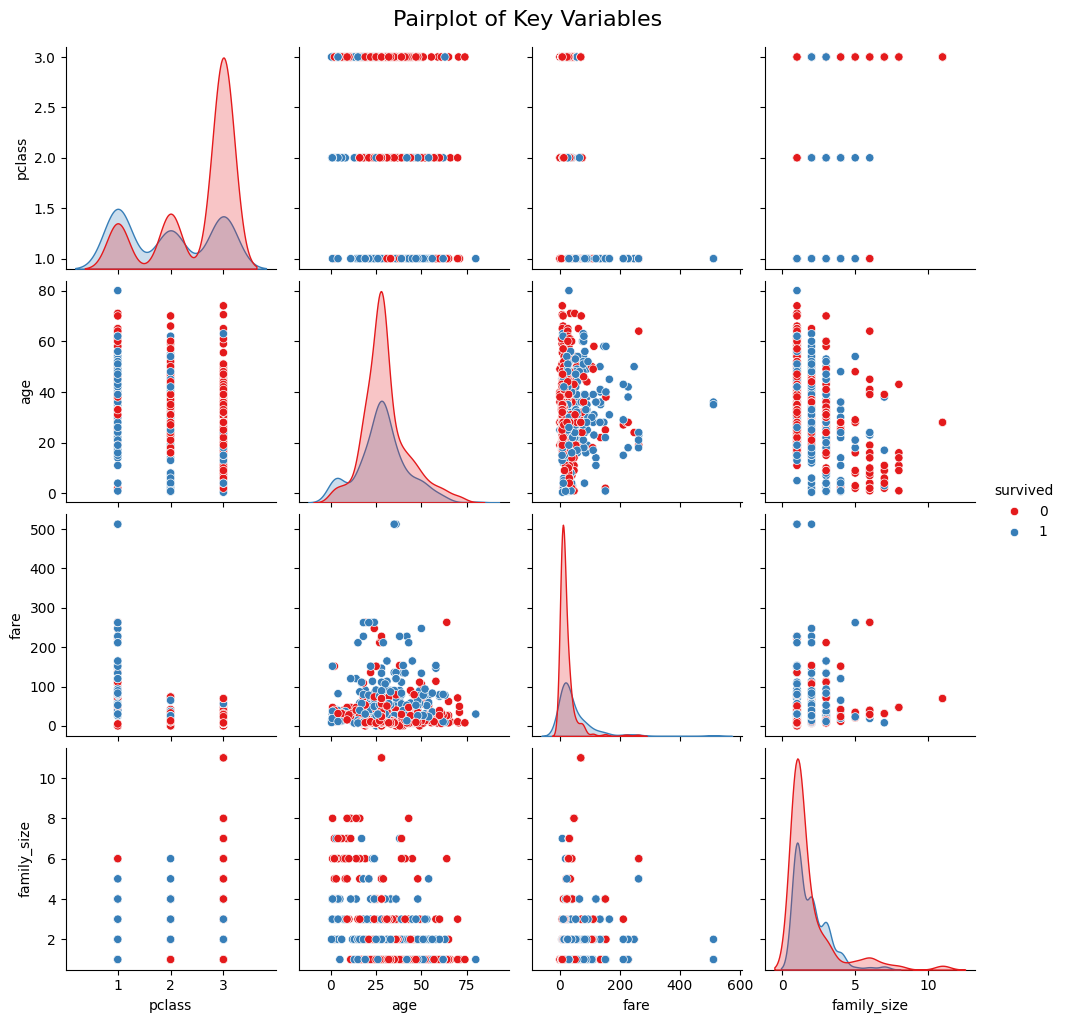

In [16]:
# Pairplot of key variables
plt.figure(figsize=(15, 12))
sns.pairplot(titanic[['survived', 'pclass', 'age', 'fare', 'family_size']], hue='survived', palette='Set1')
plt.suptitle("Pairplot of Key Variables", y=1.02, fontsize=16)
plt.show()

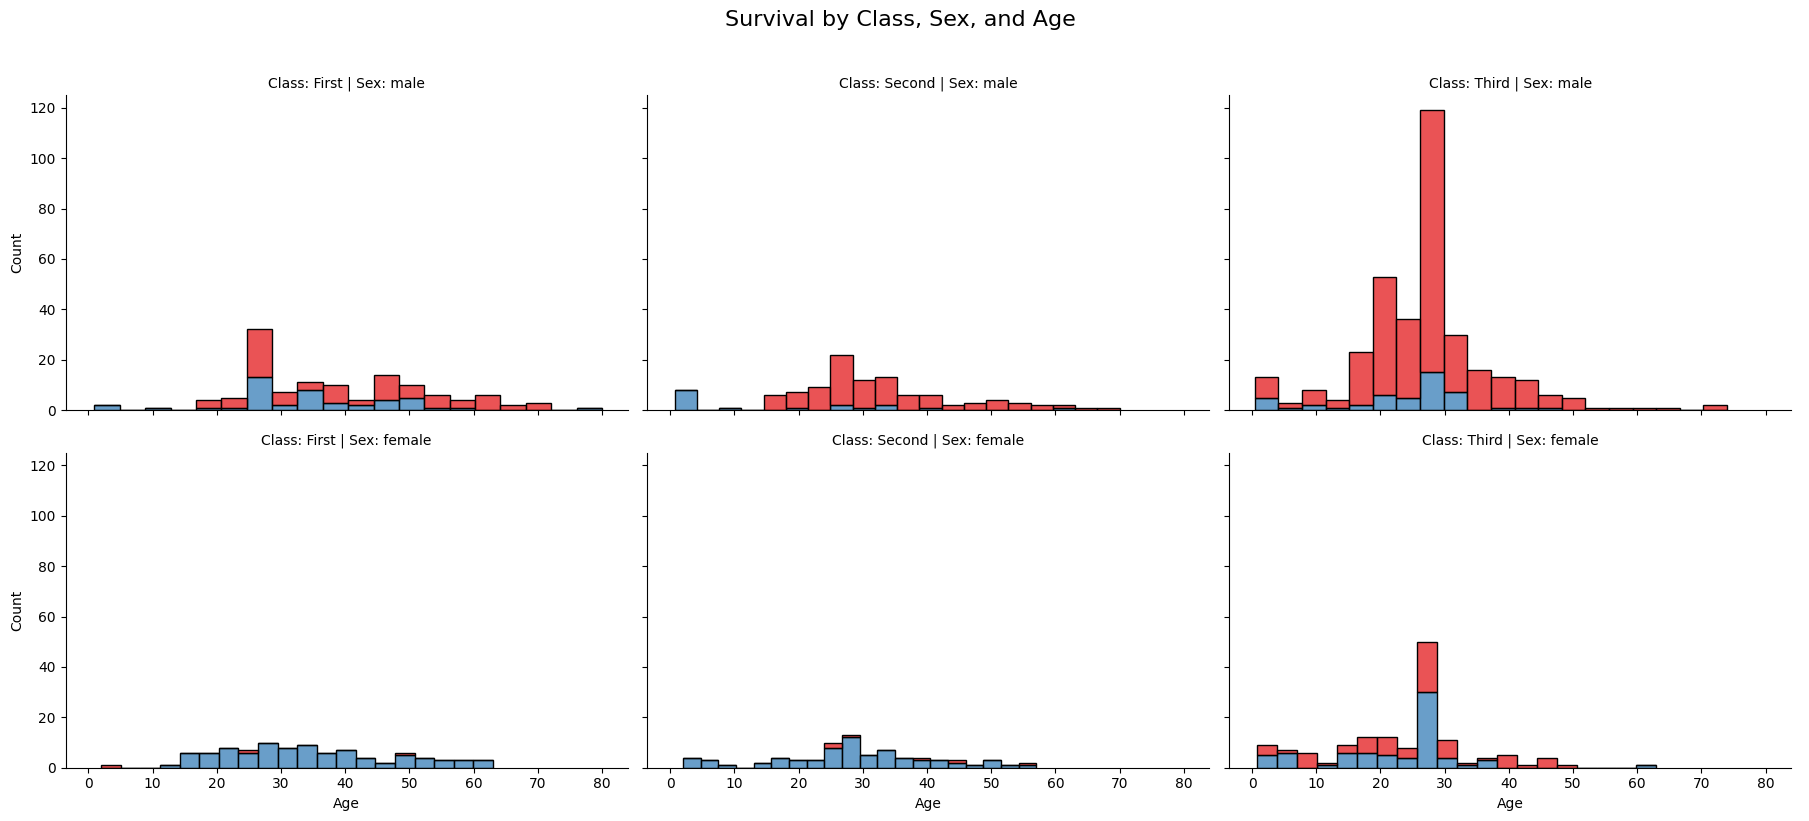

In [17]:
# FacetGrid to explore survival by class, sex, and age
g = sns.FacetGrid(titanic, col='class', row='sex', height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x='age', hue='survived', multiple='stack', bins=20, palette='Set1')
g.add_legend()
g.set_titles("Class: {col_name} | Sex: {row_name}")
g.set_axis_labels("Age", "Count")
g.fig.suptitle("Survival by Class, Sex, and Age", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

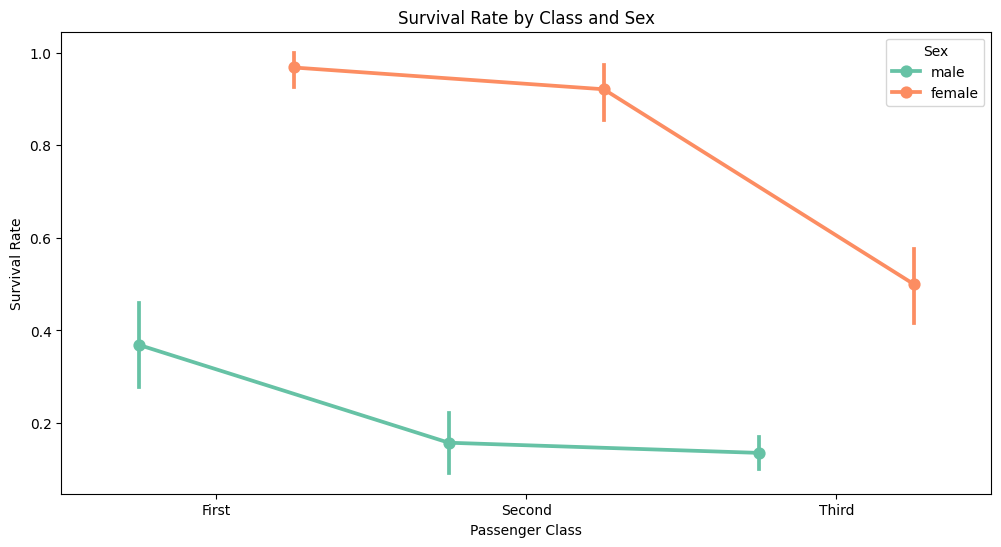

In [18]:
# Pointplot to show survival rate by class and sex
plt.figure(figsize=(12, 6))
sns.pointplot(x='class', y='survived', hue='sex', data=titanic, palette='Set2', dodge=0.5, 
             order=['First', 'Second', 'Third'])
plt.title("Survival Rate by Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Sex")
plt.show()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group', 'embarked_name', 'family_size',
       'family_category', 'fare_category'],
      dtype='object')
    age            age_group
0  22.0  Young Adult (19-35)
1  38.0        Adult (36-60)
2  26.0  Young Adult (19-35)
3  35.0  Young Adult (19-35)
4  35.0  Young Adult (19-35)


<Figure size 1500x1000 with 0 Axes>

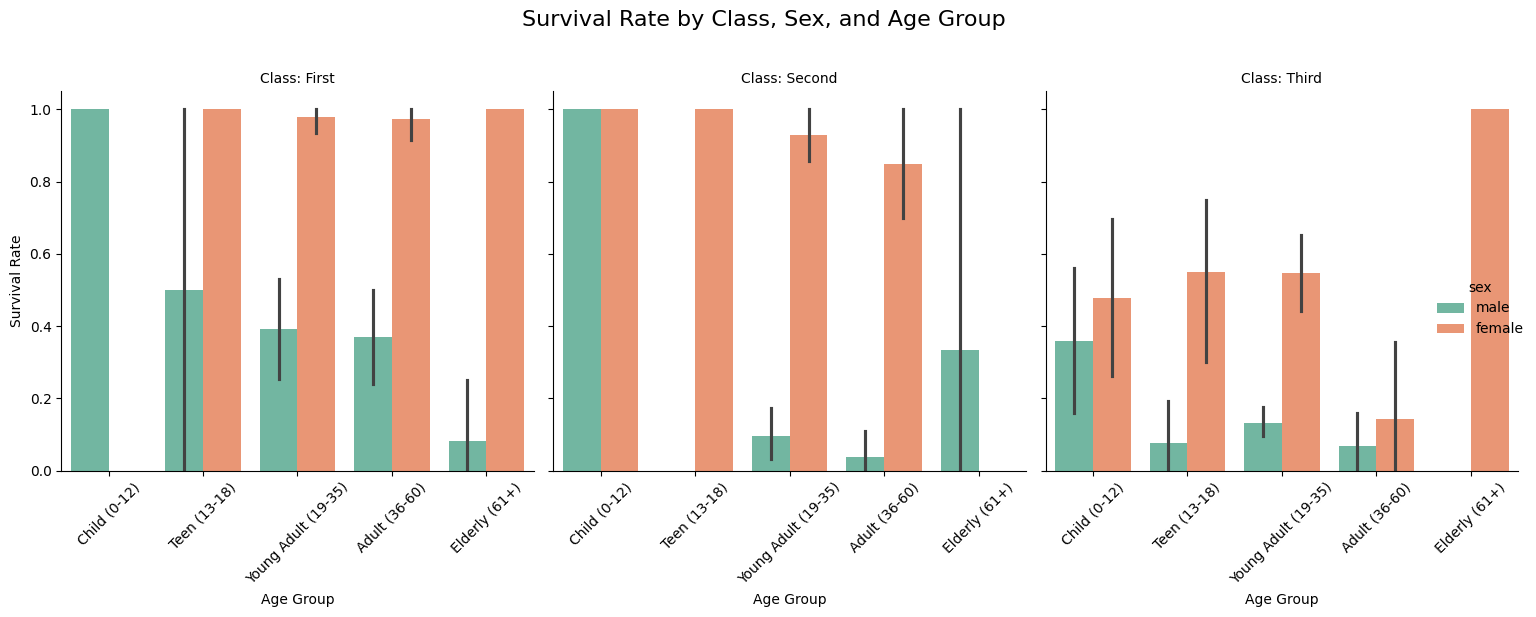

In [19]:
print(titanic.columns)
# Define bins and labels
bins = [0, 12, 18, 35, 60, 120]
labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 'Adult (36-60)', 'Elderly (61+)']

# Create a new column 'age_group' based on 'age'
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=True)

# Check the new column
print(titanic[['age', 'age_group']].head())

# Catplot to show survival rate by class, sex, and age group
plt.figure(figsize=(15, 10))
g = sns.catplot(x='age_group', y='survived', hue='sex', col='class', data=titanic, kind='bar', 
                palette='Set2', height=6, aspect=0.8, order=labels)
g.set_xticklabels(rotation=45)
g.set_titles("Class: {col_name}")
g.set_axis_labels("Age Group", "Survival Rate")
g.fig.suptitle("Survival Rate by Class, Sex, and Age Group", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Conclusion

Based on our exploratory data analysis, we can draw several conclusions about the factors that influenced survival rates on the Titanic:

1. **Gender**: Women had a significantly higher survival rate than men, suggesting that the "women and children first" policy was largely followed.

2. **Class**: Passengers in higher classes (First and Second) had higher survival rates than those in Third class, indicating that social status played a role in who got access to lifeboats.

3. **Age**: Children had higher survival rates than adults, particularly in Second and Third classes. This supports the "women and children first" policy.

4. **Family Size**: Passengers traveling with small families (2-4 members) had higher survival rates than those traveling alone or with large families.

5. **Fare**: Passengers who paid higher fares had higher survival rates, which is correlated with passenger class.

6. **Port of Embarkation**: Passengers who embarked from Cherbourg had higher survival rates than those who embarked from Queenstown or Southampton.

7. **Interaction Effects**: The combination of being female and in First class resulted in the highest survival rate, while being male and in Third class resulted in the lowest survival rate.

These findings provide valuable insights into the social dynamics and decision-making processes during the Titanic disaster, highlighting how factors such as gender, class, and age influenced who survived and who did not.